In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [4]:
path = '../../dados/procucao_gado_MS.csv'
df = pd.read_csv(path, sep=';')

In [5]:
df_aux = df[['peso','acabamento', 'maturidade', 'classificacao', 'ano']]

In [6]:
# Retirar as variáveis obtidas após o abate 
df = df.drop(['peso','acabamento', 'maturidade', 'classificacao', 'ano'],axis=1)

### Método Elbow
Método projetado para ajudar a encontrar o número ideal de clusters em um conjunto de dados.

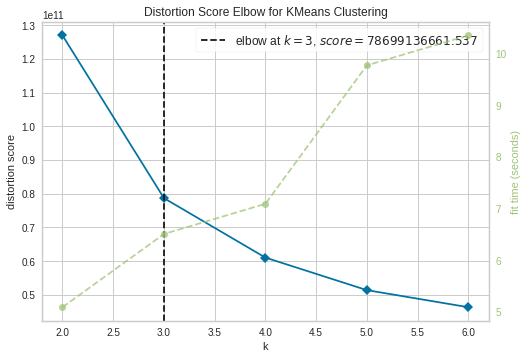

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
model = KElbowVisualizer(KMeans(), k=6)
model.fit(df)
model.show()

### Implementação com k =3

In [7]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(df)

In [8]:
labels =kmeans.labels_

In [9]:
s = metrics.silhouette_score(df, labels, metric='euclidean')
dbs = metrics.davies_bouldin_score(df, labels)
calinski = metrics.calinski_harabasz_score(df, labels)

In [10]:
print(s, dbs,calinski)

0.40848011430046727 0.8677119857944285 1312261.2389359628


### Unindo os data frames

In [12]:
df_clusters = df.join(df_aux)

In [13]:
df_clusters["cluster"] = labels

## Análise

In [36]:
df_c01= df_clusters.query('cluster == 0')
df_c02= df_clusters.query('cluster == 1')
df_c03= df_clusters.query('cluster == 2')

In [37]:
print('Cluster 01', df_c01.shape[0],'\nCluster 02',df_c02.shape[0],'\nCluster 03',df_c03.shape[0])

Cluster 01 444348 
Cluster 02 222710 
Cluster 03 293881


In [18]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [20]:
df_clusters.groupby("cluster").describe().T

cluster                                              0              1  \
tipificacao_1                     count  444348.000000  222710.000000   
                                  mean        0.491183       0.514481   
                                  std         0.499923       0.499791   
                                  min         0.000000       0.000000   
                                  25%         0.000000       0.000000   
                                  50%         0.000000       1.000000   
                                  75%         1.000000       1.000000   
                                  max         1.000000       1.000000   
tipificacao_2                     count  444348.000000  222710.000000   
                                  mean        0.221311       0.208010   
                                  std         0.415130       0.405885   
                                  min         0.000000       0.000000   
                                  25%         0.000000       0.000000   
                                  50%         0.000000       0.000000   
                                  75%         0.000000       0.000000   
                                  max         1.000000       1.000000   
tipificacao_3                     count  444348.000000  222710.000000   
                                  mean        0.287507       0.277509   
                                  std         0.452600       0.447771   
                                  min         0.000000       0.000000   
                                  25%         0.000000       0.000000   
                                  50%         0.000000       0.000000   
                                  75%         1.000000       1.000000   
                                  max         1.000000       1.000000   
classificacao_estabelecimento     count  444348.000000  222710.000000   
                                  mean       24.547976      24.134588   
                                  std         3.712588       3.228197   
                                  min        21.000000      21.000000   
                                  25%        21.000000      21.000000   
                                  50%        26.000000      26.000000   
                                  75%        26.000000      26.000000   
                                  max        30.000000      30.000000   
outros_incentivos                 count  444348.000000  222710.000000   
                                  mean        0.064278       0.013973   
                                  std         0.245249       0.117380   
                                  min         0.000000       0.000000   
                                  25%         0.000000       0.000000   
                                  50%         0.000000       0.000000   
                                  75%         0.000000       0.000000   
                                  max         1.000000       1.000000   
pratica_recuperacao_pastagem      count  444348.000000  222710.000000   
                                  mean        0.592997       0.520942   
                                  std         0.491276       0.499562   
                                  min         0.000000       0.000000   
                                  25%         0.000000       0.000000   
                                  50%         1.000000       1.000000   
                                  75%         1.000000       1.000000   
                                  max         1.000000       1.000000   
fertiirrigacao                    count  444348.000000  222710.000000   
                                  mean        0.097095       0.146563   
                                  std         0.296088       0.353670   
                                  min         0.000000       0.000000   
                                  25%         0.000000       0.000000   
                                  50%         0.000000    

### Cálculo variância - Atributos mais significativos

In [15]:
centroids = kmeans.cluster_centers_

In [16]:
var = []

max = len(centroids[0])
for i in range(max):
    var.append([df.columns.values[i], centroids[:, i].var()])
aux_print = []
aux_print = sorted(var,key=lambda l:l[1], reverse=True)

aux_print

[['tot12m_chuva', 210077.9398860497],
 ['tot6m_chuva', 51816.93143041667],
 ['tot3m_chuva', 19035.974618843233],
 ['tot1m_chuva', 1735.2028198609394],
 ['med1m_prer_soja', 1.9509375944381813],
 ['med3m_prer_soja', 1.784414517185794],
 ['med6m_prer_soja', 1.207098585553629],
 ['med3m_prer_boi', 0.6567885426579633],
 ['med1m_prer_boi', 0.48961342688120574],
 ['med12m_prer_soja', 0.44860570180438414],
 ['mes', 0.4332920985827224],
 ['latitude', 0.42014063702680343],
 ['med6m_prer_boi', 0.38252762982752575],
 ['med3m_prer_milho', 0.3567695657937595],
 ['med6m_prer_milho', 0.3455685398546251],
 ['med1m_prer_milho', 0.2593345614543754],
 ['med12m_prer_milho', 0.15153455632421092],
 ['longitude', 0.11803972689693498],
 ['med12m_prer_boi', 0.06611198400449249],
 ['classificacao_estabelecimento', 0.045738527015261654],
 ['med12m_formituinst', 0.02347329779396436],
 ['categoria', 0.012944175900471191],
 ['ilp', 0.007446811710625292],
 ['med3m_formituinst', 0.004290600004792139],
 ['med1m_formitu

In [61]:
description = df_clusters.groupby("cluster")['tot12m_chuva','tot6m_chuva','tot3m_chuva',
                                             'tot1m_chuva','med1m_prer_soja','med3m_prer_soja',
                                             'med6m_prer_soja','med3m_prer_boi', 
                                             'med1m_prer_boi','mes','med12m_prer_soja',
                                             'latitude', 'med6m_prer_boi',
                                             'med3m_prer_milho','med6m_prer_milho',
                                             'med1m_prer_milho','med12m_prer_milho',
                                             'longitude','med12m_prer_boi', 
                                             'classificacao_estabelecimento',
                                             'med12m_formituinst','categoria']

/tmp/ipykernel_22181/831677040.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = df_clusters.groupby("cluster")['tot12m_chuva','tot6m_chuva','tot3m_chuva',


In [62]:
description = description.mean()
print(description)

         tot12m_chuva  tot6m_chuva  tot3m_chuva  tot1m_chuva  med1m_prer_soja  \
cluster                                                                         
0          597.620991   261.939810   124.793303    45.087709        80.170332   
1         1706.009897   817.020395   456.998583   146.691868        79.598867   
2         1318.676057   480.664674   231.260087    84.974967        82.843786   

         med3m_prer_soja  med6m_prer_soja  med3m_prer_boi  med1m_prer_boi  \
cluster                                                                     
0              79.584578        78.043514      140.928827      141.806645   
1              79.288237        77.917237      142.872448      143.012648   
2              82.295224        80.331096      142.258266      143.465016   

              mes  ...  med6m_prer_boi  med3m_prer_milho  med6m_prer_milho  \
cluster            ...                                                       
0        8.370410  ...      140.323026         34.61

In [21]:
df_var = df_clusters[['tot12m_chuva','tot6m_chuva','tot3m_chuva',
                                             'tot1m_chuva','med1m_prer_soja','med3m_prer_soja',
                                             'med6m_prer_soja','med3m_prer_boi', 
                                             'med1m_prer_boi','mes','med12m_prer_soja',
                                             'latitude', 'med6m_prer_boi',
                                             'med3m_prer_milho','med6m_prer_milho',
                                             'med1m_prer_milho','med12m_prer_milho',
                                             'longitude','med12m_prer_boi', 
                                             'classificacao_estabelecimento',
                                             'med12m_formituinst','categoria', 'cluster']]

In [22]:
df_var.groupby("cluster").describe().T

cluster                                          0              1  \
tot12m_chuva                  count  444348.000000  222710.000000   
                              mean     1317.364088     597.620991   
                              std       202.956100     205.079657   
                              min       880.460000       9.420000   
                              25%      1179.590000     499.470000   
                              50%      1292.200000     610.930000   
                              75%      1476.950000     712.920000   
                              max      1827.870000    1013.740000   
tot6m_chuva                   count  444348.000000  222710.000000   
                              mean      479.355191     261.939810   
                              std       144.161012     130.503623   
                              min       103.430000      28.910000   
                              25%       367.380000     161.680000   
                              50%       476.890000     265.600000   
                              75%       584.790000     353.630000   
                              max       866.440000     755.430000   
tot3m_chuva                   count  444348.000000  222710.000000   
                              mean      230.511245     124.793303   
                              std       106.473365      79.392852   
                              min        21.550000       2.040000   
                              25%       143.440000      63.410000   
                              50%       210.710000     118.910000   
                              75%       309.830000     160.560000   
                              max       567.830000     598.000000   
tot1m_chuva                   count  444348.000000  222710.000000   
                              mean       84.747993      45.087709   
                              std        61.975665      45.419435   
                              min         0.190000       0.000000   
                              25%        40.060000       7.560000   
                              50%        67.800000      34.000000   
                              75%       121.740000      62.710000   
                              max       422.400000     296.730000   
med1m_prer_soja               count  444348.000000  222710.000000   
                              mean       82.833678      80.170332   
                              std         8.400926       8.592733   
                              min        65.750000      65.750000   
                              25%        73.400000      71.470000   
                              50%        85.380000      81.910000   
                              75%        88.980000      87.370000   
                              max        95.790000      95.790000   
med3m_prer_soja               count  444348.000000  222710.000000   
                              mean       82.282882      79.584578   
                              std         8.419725       8.582626   
                              min        67.840000      67.840000   
                              25%        72.530000      70.650000   
                              50%        86.180000      78.900000   
                              75%        89.870000      87.660000   
                              max        91.960000      91.960000   
med6m_prer_soja               count  444348.000000  222710.000000   
                              mean       80.323923      78.043514   
                              std         7.738276       7.749202   
                              min        69.220000      69.220000   
                              25%        71.580000      70.570000   
                              50%        82.380000      76.250000   
                              75%        88.540000      86.530000   
                              max        89.170000      89.170000   
med3m_prer_boi                count  444348.000000  222710.000000  

## Gráfico

In [42]:
n_animais = df_clusters.cluster.value_counts()

In [43]:
n_animais

0    444348
2    293881
1    222710
Name: cluster, dtype: int64

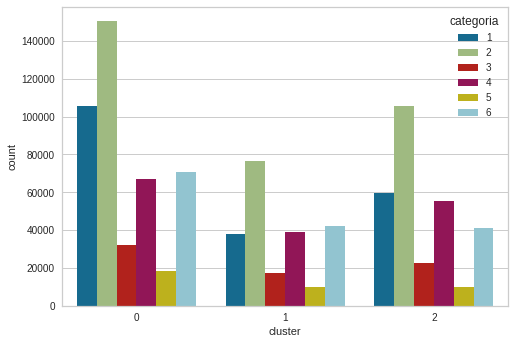

In [41]:
sns.countplot(x="cluster", hue="categoria", data=df_clusters)
plt.show()